In [1]:
import pandas as pd

data = {
    "review_text": [
        "This product is amazing! Highly recommended.",
        "Very poor quality. Completely disappointed.",
        "It's okay, not great but works fine.",
        "Absolutely love this item. Worth every penny!",
        "Terrible experience. Waste of money.",
        "Good product for the price.",
        "Not satisfied with the performance.",
        "Exceeded my expectations!",
        "Average quality, nothing special.",
        "Fantastic build and excellent support."
    ],
    
    "rating": [5, 1, 3, 5, 1, 4, 2, 5, 3, 5],
    
    "review_date": [
        "2024-01-05",
        "2024-01-10",
        "2024-02-01",
        "2024-02-15",
        "2024-03-01",
        "2024-03-12",
        "2024-03-25",
        "2024-04-02",
        "2024-04-18",
        "2024-05-01"
    ],
    
    "product_name": [
        "Wireless Headphones",
        "Wireless Headphones",
        "Bluetooth Speaker",
        "Bluetooth Speaker",
        "Smart Watch",
        "Smart Watch",
        "Laptop Stand",
        "Laptop Stand",
        "Phone Case",
        "Phone Case"
    ]
}

df = pd.DataFrame(data)

df.to_csv("amazon_reviews.csv", index=False)

print("amazon_reviews.csv file created successfully!")

✅ amazon_reviews.csv file created successfully!


In [2]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shaik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
df = pd.read_csv("amazon_reviews.csv")

print(df.head())

                                     review_text  rating review_date  \
0   This product is amazing! Highly recommended.       5  2024-01-05   
1    Very poor quality. Completely disappointed.       1  2024-01-10   
2           It's okay, not great but works fine.       3  2024-02-01   
3  Absolutely love this item. Worth every penny!       5  2024-02-15   
4           Terrible experience. Waste of money.       1  2024-03-01   

          product_name  
0  Wireless Headphones  
1  Wireless Headphones  
2    Bluetooth Speaker  
3    Bluetooth Speaker  
4          Smart Watch  


In [5]:
sia = SentimentIntensityAnalyzer()

In [6]:
def classify_sentiment(text):
    score = sia.polarity_scores(str(text))["compound"]
    
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["review_text"].apply(classify_sentiment)

print(df[["review_text", "Sentiment"]].head())

                                     review_text Sentiment
0   This product is amazing! Highly recommended.  Positive
1    Very poor quality. Completely disappointed.  Negative
2           It's okay, not great but works fine.  Positive
3  Absolutely love this item. Worth every penny!  Positive
4           Terrible experience. Waste of money.  Negative


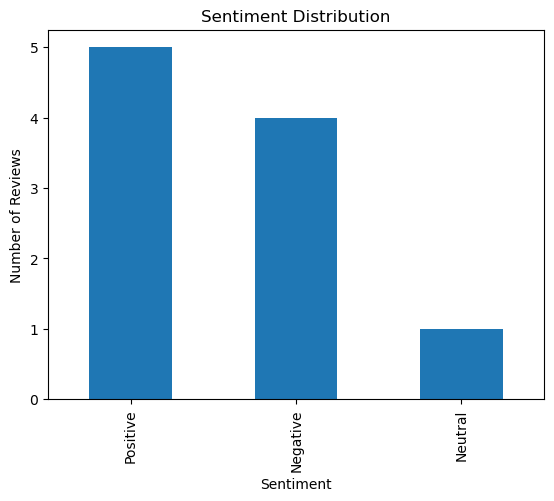

In [7]:
plt.figure()
df["Sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

<Figure size 640x480 with 0 Axes>

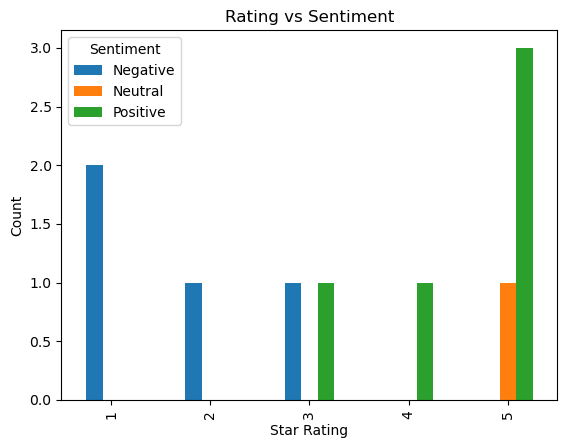

In [8]:
plt.figure()
pd.crosstab(df["rating"], df["Sentiment"]).plot(kind="bar")
plt.title("Rating vs Sentiment")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()

In [9]:
df["Positive_Score"] = df["review_text"].apply(lambda x: sia.polarity_scores(str(x))["pos"])
df["Negative_Score"] = df["review_text"].apply(lambda x: sia.polarity_scores(str(x))["neg"])
df["Neutral_Score"] = df["review_text"].apply(lambda x: sia.polarity_scores(str(x))["neu"])

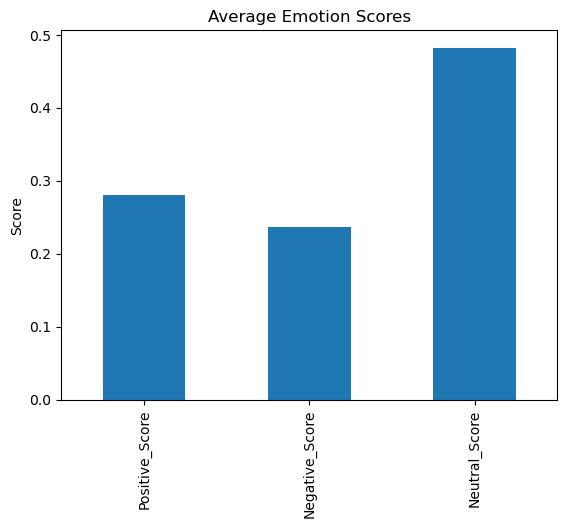

In [10]:
plt.figure()
df[["Positive_Score", "Negative_Score", "Neutral_Score"]].mean().plot(kind="bar")
plt.title("Average Emotion Scores")
plt.ylabel("Score")
plt.show()

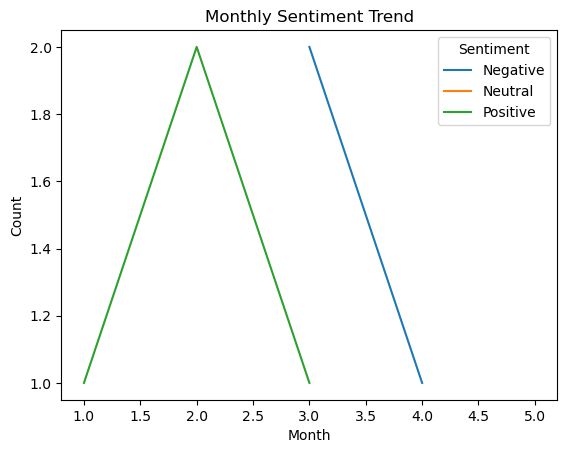

In [11]:
df["review_date"] = pd.to_datetime(df["review_date"])

df.groupby(df["review_date"].dt.month)["Sentiment"].value_counts().unstack().plot()
plt.title("Monthly Sentiment Trend")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()